**Question 1:**

CODING: Students in PHYS150 were tasked to measure the local acceleration of gravity $g$ by dropping an object from height $H$, measuring the time $t$ it takes to reach the ground, and using the formula,
\begin{equation}
    H = \frac{1}{2}gt^2.
\end{equation}
The datafile $\texttt{GravityMeasurements.dat}$ contains
  measurements of the value of $H$ in meters, its uncertainty $\sigma_{H_i}$, time $t$ in seconds, and its uncertainty $\sigma_{t_i}$ made independently by $N=350$ students.  The file has five columns -- (1)
  index $i=0,...,N-1$, (2) measurement $\{H_i\}$, (3) its corresponding uncertainty $\{\sigma_{H_i}\}$, (4) measurement $\{t_i\}$, and (5) its corresponding uncertainty $\{\sigma_{t_i}\}$ from each student.
  
```
      0   20.066  1.120   2.092  0.084
      1   20.363  0.389   2.023  0.050
      2   21.498  0.706   1.939  0.115
      3   19.709  0.791   1.963  0.118
      4   21.192  1.225   2.132  0.097
      5   16.631  1.479   1.877  0.112
      ...
```

 

(a) (1 pt) Calculate the values of acceleration of gravity $\{g_i\}$.

(b) (2 pts) Calculate the corresponding uncertainties $\{\sigma_{g_i}\}$ using the proper error propagation formulae.
    
(c) (2 pts) In this part and the next one, ignore the uncertainties
    $\{\sigma_{g_i}\}$, but rather estimate it directly from the measurements by
    computing the standard deviation of $\{g_i\}$.  What is the best estimate of
    this value $\tilde{\sigma}_g$?
    
(d) (2 pts) Using this value of $\tilde{\sigma}_g$, calculate the maximum-likelihood
    estimate (MLE) of the mean of $\{g_i\}$ and the uncertainty in the mean from the
    measurements.

(e) (2 pts) Now compute the inverse-variance weighted MLE of the mean of $\{g_i\}$ using
    the actual uncertainty $\{\sigma_{g_i}\}$ on each measurement.  Also compute the
    uncertainty in the mean to show that it is smaller than the value
    $\tilde{\sigma}_g$ estimated in (a).

In [25]:
# Problem 1a
import numpy as np
def calculate_g(data):
    """Given measurements of H and t, calculate the inferred gravitational acceleration constant, g.
    
    The input height (H) and time (t) are given as data['H'] and data['t'].
    
    Returns an array with the corresponding g values.
    """
    H = data['H']
    t = data['t'] 
    g = 2 * H / t**2
    return g

In [27]:
import numpy as np

data = np.genfromtxt('GravityMeasurements.dat', names=['ID','H','sigma_H','t','sigma_t'])

print('The first few rows are:')
for i in range(6):
    print(data[i])
print()

g = calculate_g(data)

print('The first few g values are: ',g[:5])
print('The lowest estimate is ',np.min(g))
print('The highest estimate is ',np.max(g))
print('The mean estimate is ',np.mean(g))

# None of the students had measurements that were more than 30% off.
assert np.allclose(g, 9.8, rtol=0.3)

The first few rows are:
(0., 20.066, 1.12, 2.092, 0.084)
(1., 20.363, 0.389, 2.023, 0.05)
(2., 21.498, 0.706, 1.939, 0.115)
(3., 19.709, 0.791, 1.963, 0.118)
(4., 21.192, 1.225, 2.132, 0.097)
(5., 16.631, 1.479, 1.877, 0.112)

The first few g values are:  [ 9.16996004  9.95130395 11.43595496 10.22949009  9.32454266]
The lowest estimate is  7.357945689904639
The highest estimate is  12.505430961137918
The mean estimate is  9.81354685188228


In [29]:
# Problem 1b
def propagate_sigma_g(data):
    """Calculate the uncertainties in the g measurement based on the reported uncertainties in H and t.
    
    The input height (H) and time (t) are given as data['H'] and data['t'].
    Their respective estimated uncertainties are data['sigma_H'] and data['sigma_t'].
    
    Returns an array with the corresponding sigma_g values.
    """
    H = data['H'] 
    t = data['t']  
    sigma_H = data['sigma_H']  
    sigma_t = data['sigma_t'] 
    dgdH = 2 / t**2
    dgdT = -4 * H / t**3
    sigma_g = np.sqrt((dgdH * sigma_H)**2 + (dgdT * sigma_t)**2)
    
    return sigma_g

In [31]:
sigma_g = propagate_sigma_g(data)

print('The first few calculated uncertainties are: ',sigma_g[:10])
print('The range of sigma_g values is ',np.min(sigma_g),np.max(sigma_g))

# The "pull" is sometimes a useful quantity to look at.
# It is the difference of each measurement from the mean (or expected value) divided by sigma.
# For Gaussian errors, you should expect around 68% of values to have pull between -1 and 1.
# If this isn't the case, it could mean your errors are poorly estimated, or the distribution is not
# Gaussian, or both.

pull = (g-np.mean(g)) / sigma_g
print('The first few pulls are: ',pull[:5])
frac_lt_1 = np.sum(np.abs(pull) < 1) / len(pull)
print(f'The fraction of points with |pull| < 1 = {frac_lt_1:0.3f}')

The first few calculated uncertainties are:  [0.89680364 0.52736391 1.40753685 1.29654819 1.0052088  1.40511361
 0.52327863 1.30351406 0.71850238 0.82814092]
The range of sigma_g values is  0.24308647305001324 2.0710334154258025
The first few pulls are:  [-0.71764518  0.26121829  1.15265764  0.32080816 -0.48647026]
The fraction of points with |pull| < 1 = 0.671


In [33]:
# Problem 1c
def estimate_unweighted_sigma_g(data):
    """Estimate an overall estimate of the uncertainties in the g values based on the empirical
    standard deviation.
    
    This estimate ignores the students' own estimates of the uncertainties on H and t, and instead
    just uses their calculated g values.
    
    Returns a single (not array) value sigma_g.
    """
    # Hints: 1. Use your calculate_g function to get the array of g values.
    #        2. Feel free to use appropriate numpy or scipy functions.
    
    g_values = calculate_g(data)
    sigma_g = np.std(g_values, ddof=1) 
    return sigma_g

In [35]:
unweighted_sigma_g = estimate_unweighted_sigma_g(data)

print(f'The estimated unweighted sigma_g is {unweighted_sigma_g:.4f}')
print(f'Compare this to the mean propagated sigma_g: {np.mean(sigma_g):.4f}')

The estimated unweighted sigma_g is 0.8511
Compare this to the mean propagated sigma_g: 0.8096


In [37]:
# Problem 1d
def calculate_unweighted_mle_meang(data):
    """Estimate the unweighted maximum-likelihood estimate of <g> and its uncertainty.
    
    This estimate ignores the students' own estimates of the uncertainties on H and t.
    
    Returns a tuple of two values: <g>, sigma_<g>
    """
    # Hints: 1. Use calculate_g to get the array of g values.
    #        2. Use estimate_unweighted_sigma_g for sigma_g.
    #        3. Feel free to use appropriate numpy or scipy functions.
    
    g_values = calculate_g(data)
    mean_g = np.mean(g_values)
    sigma_g = estimate_unweighted_sigma_g(data)
    sigma_mean_g = sigma_g / np.sqrt(len(g_values))
    return mean_g, sigma_mean_g

In [39]:
meang, sigma_meang = calculate_unweighted_mle_meang(data)

print('Using unweighted maximum likelihood,')
print(f'the mean estimate of g is {meang:0.4f} +- {sigma_meang:0.4f}')

Using unweighted maximum likelihood,
the mean estimate of g is 9.8135 +- 0.0455


In [41]:
# Problem 1e
def calculate_weighted_mle_meang(data):
    """Estimate the inverse-variance weighted maximum-likelihood estimate of <g> and its uncertainty.
    
    This estimate uses the students' own estimates of the uncertainties on H and t to propagate
    into a separate estimate of sigma_g for each data point.
    
    Returns a tuple of two values: <g>, sigma_<g>
    """
    # Hints: 1. Use calculate_g to get the array of g values.
    #        2. Use propagate_sigma_g for sigma_g.
    #        3. Feel free to use appropriate numpy or scipy functions.
    
    g_values = calculate_g(data)
    sigma_g_values = propagate_sigma_g(data)
    weights = 1 / sigma_g_values**2
    weighted_mean_g = np.sum(weights * g_values) / np.sum(weights)
    sigma_weighted_mean_g = np.sqrt(1 / np.sum(weights))
    return weighted_mean_g, sigma_weighted_mean_g

In [43]:
meang, sigma_meang = calculate_weighted_mle_meang(data)

print('Using weighted maximum likelihood,')
print(f'The mean estimate of g is {meang:0.4f} +- {sigma_meang:0.4f}')


Using weighted maximum likelihood,
The mean estimate of g is 9.7531 +- 0.0306


**Question 2:**

CODING: Using the same dataset as above:

(a) (3 pts) Calculate the $\chi^2$ value defined as:

\begin{equation}
      \chi^2 = \sum_{i=0}^{N-1} \left( \frac{g_i - \mu^\prime}{\sigma_{g_i}} \right)^2
\end{equation}
    
where $\mu^\prime$ is the inverse-variance weighted MLE of the mean of $\{g_i\}$
from 1(c).
     
(b) (4 pts) Now calculate the $\chi^2$ value as a function of $\mu^\prime$ from
     $\mu^\prime = 9.6$ to 10.0 in steps of 0.001 and show that the value of
     $\mu^\prime$ that minimizes the $\chi^2$ is indeed given by the answer from 1(c).
     
(c) (4 pts) Finally, determine the lower and upper values of $\mu^\prime$ at which the
     $\chi^2$ is larger than the minimum value by 1.00.  
     (NOTE: These values should match the $\pm 1\sigma$ range from
     the MLE in part 1(e) and is another way to perform parameter estimation using the
     $\chi^2$ statistic.)
     
(d) **EXTRA CREDIT**: (2 pts) Make a single plot that shows all of these facts with appropriate labels to show the important features.
     

In [46]:
# Problem 2a
def calculate_mle_chisq(data):
    """Calculate chisq for the inverse-variance weighted MLE estimate of mu'.
    
    The sigma_g values are based on the students' estimated uncertainties sigma_H and sigma_t.
    
    Returns chisq
    """
    # Hints: 1. Use calculate_g to get the array of g values.
    #        2. Use propagate_sigma_g for sigma_g.
    #        3. Use calculate_weighted_mle_meang to get mu'.

    g_values = calculate_g(data)
    sigma_g_values = propagate_sigma_g(data)
    mu_prime, _ = calculate_weighted_mle_meang(data)
    chisq = np.sum((g_values - mu_prime)**2 / sigma_g_values**2)
    return chisq

In [48]:
chisq = calculate_mle_chisq(data)

print(f'The chisq estimate for the MLE estimate of <g> is {chisq:.2f}')
print('This should be roughly comparable to the number of data points: ',len(data))


The chisq estimate for the MLE estimate of <g> is 376.27
This should be roughly comparable to the number of data points:  350


In [50]:
# Problem 2b
def calculate_chisq_range(data, min_mu, max_mu):
    """Calculate chisq over a range of mu values from min_mu to max_mu in steps of 0.001
    
    This function will generate an array of mu values over the given range.
    For each value of mu, it will calculate the corresponding chisq value.

    The sigma_g values are based on the students' estimated uncertainties sigma_H and sigma_t.

    Note: The output mu values should be monotonically increasing.
    
    Returns mu_array, chisq_array as arrays of equal length.
    """
    # Hints: 1. Use calculate_g to get the array of g values.
    #        2. Use propagate_sigma_g for sigma_g.
    
    g_values = calculate_g(data)
    sigma_g_values = propagate_sigma_g(data)
    mu_array = np.arange(min_mu, max_mu, 0.001)
    chisq_array = np.zeros(mu_array.shape)
    for idx, mu in enumerate(mu_array):
        chisq_array[idx] = np.sum((g_values - mu)**2 / sigma_g_values**2)
    return mu_array, chisq_array
    
def find_minimum_chisq(mu_array, chisq_array):
    """Find the minimum chisq and its corresponding mu, given arrays of each.
    
    Returns mu_minimum, chisq_minimum
    """
    # Hint: np.min(chisq_array) will return the value of the minimum.  There is another
    #       numpy function that will instead give you the index of the minimum, which 
    #       will let you access the corresponding element from mu_array.
    
    chisq_minimum = np.min(chisq_array)
    min_index = np.argmin(chisq_array)
    mu_minimum = mu_array[min_index]
    
    return mu_minimum, chisq_minimum

In [52]:
mu_array, chisq_array = calculate_chisq_range(data, 9.6, 10.0)
mu_minimum, chisq_minimum = find_minimum_chisq(mu_array, chisq_array)

print(f'The minimum chisq in steps of 0.001 is {chisq_minimum:.4f}')
print(f'mu at the minimum is {mu_minimum:.3f}')
assert chisq_minimum == np.min(chisq_array)

# Do this again for comparison.
chisq_mle = calculate_mle_chisq(data)

print('\nFor comparison:')
print(f'chisq at the MLE solution is {chisq_mle:.3f}')
print(f'The MLE estimate of mu is {calculate_weighted_mle_meang(data)[0]:.3f}')
assert np.isclose(chisq_minimum, chisq_mle, rtol=1.e-3)

The minimum chisq in steps of 0.001 is 376.2703
mu at the minimum is 9.753

For comparison:
chisq at the MLE solution is 376.270
The MLE estimate of mu is 9.753


In [54]:
# Problem 2c:
def find_one_sigma_range(mu_array, chisq_array):
    """Find a range of mu values where chisq < min_chisq + 1.0, given arrays of mu and chisq.
    
    Note: the input values in mu_array may be assumed to be monotonically increasing.
    
    Returns min_mu, max_mu.
    """
    chisq_minimum = np.min(chisq_array)
    threshold = chisq_minimum + 1.0
    indices = np.where(chisq_array < threshold)[0]
    min_mu = mu_array[indices[0]]  
    max_mu = mu_array[indices[-1]] 
    
    return min_mu, max_mu

In [56]:
min_mu, max_mu = find_one_sigma_range(mu_array, chisq_array)
print(f'Range where chiq < ({chisq_minimum:.2f} + 1) is {min_mu:.3f} < mu < {max_mu:.3f}')

print('\nFor comparison with 1(e):')
meang, sigma_meang = calculate_weighted_mle_meang(data)
print(f'The MLE estimate would predict {meang-sigma_meang:.3f} < mu < {meang+sigma_meang:.3f}')

Range where chiq < (376.27 + 1) is 9.723 < mu < 9.783

For comparison with 1(e):
The MLE estimate would predict 9.722 < mu < 9.784


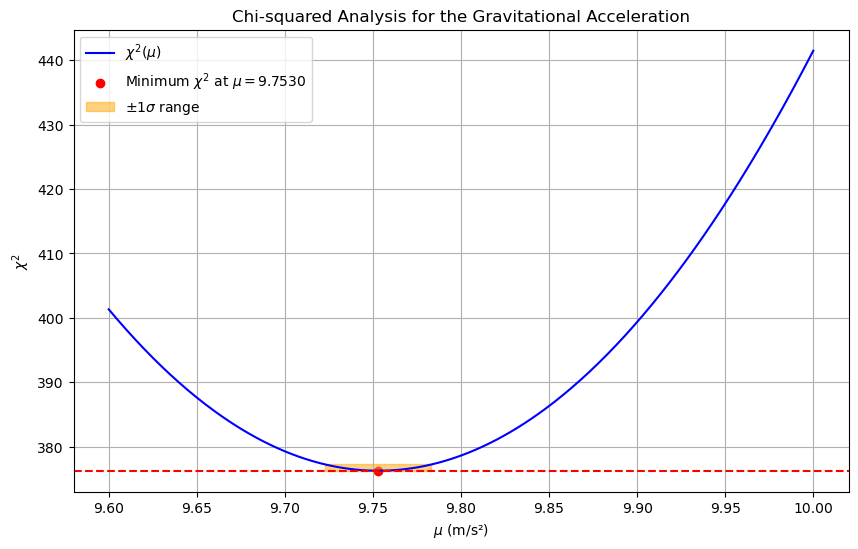

In [64]:
# Problem 2d (EXTRA CREDIT)

import numpy as np
import matplotlib.pyplot as plt
data = np.genfromtxt('GravityMeasurements.dat', names=['ID','H','sigma_H','t','sigma_t'])
min_mu = 9.6
max_mu = 10.0
mu_array, chisq_array = calculate_chisq_range(data, min_mu, max_mu)
mu_minimum, chisq_minimum = find_minimum_chisq(mu_array, chisq_array)
min_mu_range, max_mu_range = find_one_sigma_range(mu_array, chisq_array)

plt.figure(figsize=(10, 6))
plt.plot(mu_array, chisq_array, label=r'$\chi^2(\mu)$', color='blue')

plt.scatter(mu_minimum, chisq_minimum, color='red', label=r'Minimum $\chi^2$ at $\mu = {:.4f}$'.format(mu_minimum))
plt.axhline(y=chisq_minimum, color='red', linestyle='--')

plt.fill_betweenx([chisq_minimum, chisq_minimum + 1], min_mu_range, max_mu_range, color='orange', alpha=0.5,
                  label=r'$\pm 1\sigma$ range')

plt.xlabel(r'$\mu$ (m/s²)')
plt.ylabel(r'$\chi^2$')
plt.title('Chi-squared Analysis for the Gravitational Acceleration')
plt.legend()
plt.grid()

plt.show()
